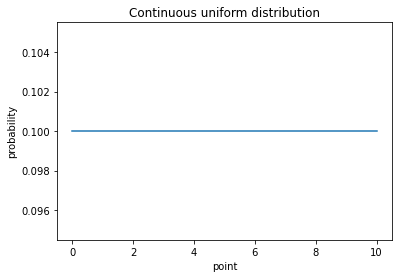

In [18]:
# 連続一様分布

# a<bを満たすa,bに対して、確率密度関数
# f(x) = 1/(b-a) :a<=x<=b 
# f(x) = 0:その他
# をもつ分布を連続一様分布といい、U(a,b)とあらわす
# 期待値：(a+b)/2 分散：(b-a)**3/12 となる


from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 10
x = np.linspace(a,b,100)
rv = uniform(loc=a,scale=b)
y = rv.pdf(x)

plt.title("Continuous uniform distribution")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

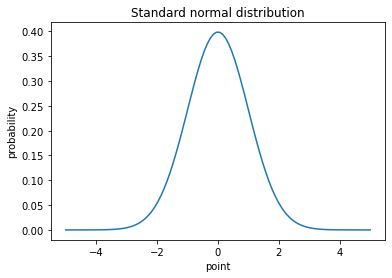

In [17]:
# 正規分布

# ガウス分布ともいい、N(μ, σ**2)とあらわす
# 特にμ=0、σ**2=1のときのN(0, 1)は標準晴雨分布と呼ばれる
# 期待値：μ 分散：σ**2 となる
# 積率母関数は、E[e**(t*x)] = exp(μ*t+1/2*(σ*t)**2)

from scipy.stats import norm

x = np.linspace(-5, 5, 100)
y = norm.pdf(x, 0, 1) # N(0, 1)
plt.title("Standard normal distribution")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

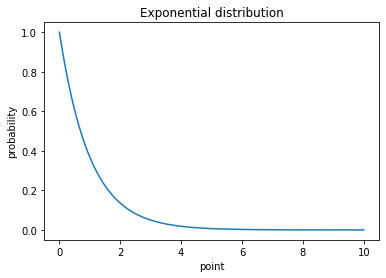

In [16]:
# 指数分布

# λ>0に対し、確率密度関数
# f(x) = λ*e**(-λ*x) : x>0
# を持つ分布を指数分布という
# 期待値：1/λ 分散：1/λ**2 となる
# 積率母関数は、E[e**(t*x)] = λ/(λ-t)

from scipy.stats import expon

x = np.linspace(0,10,100)
y = expon.pdf(x)
plt.title("Exponential distribution")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

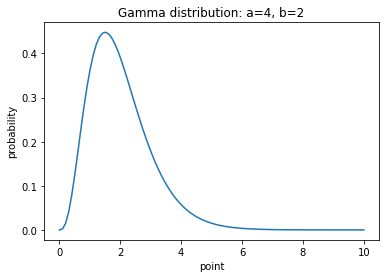

In [19]:
# ガンマ分布

# Gan(a,b)とあらわす
# 期待値：a*b 分散：a*b**2 となる
# 積率母関数は、E[e**(t*x)] = (1-b*t)**(-a) :t<1/b

from scipy.stats import gamma

a = 4
b = 2
x = np.linspace(0,10,100)
y = gamma.pdf(x=x, a=a, scale=1.0/b)
plt.title(f"Gamma distribution: a={a}, b={b}")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

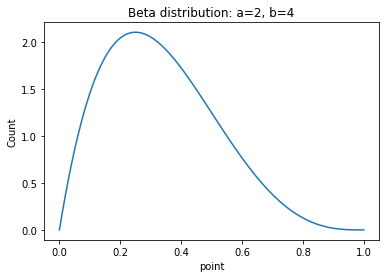

In [27]:
# ベータ分布

# Be(a,b)とあらわす
# 期待値：a/(a+b) 分散：(a*b)/((a+b)**2*(a+b+1)) となる

from scipy.stats import beta

a = 2
b = 4
x = np.linspace(0,1,100)
y = beta.pdf(x, a, b)
plt.title(f"Beta distribution: a={a}, b={b}")
plt.ylabel("Count")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

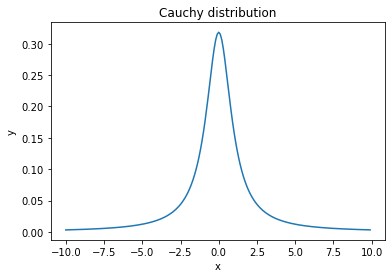

In [37]:
# コーシー分布

# 確率密度関数 f(x) = 1/(π*(1+x**2)) をもつ分布をコーシー分布という

x = np.arange(-10, 10, 0.1)
y = 1 / (np.pi * (1 + x**2))

plt.plot(x, y)
plt.title(f"Cauchy distribution")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

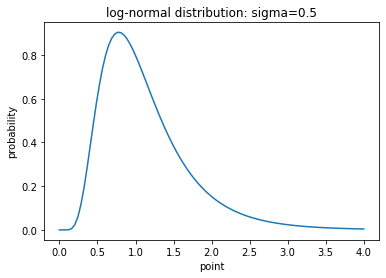

In [45]:
# 対数正規分布

# Λ(μ,σ**2)であらわす
# X~Λ(μ,σ**2)のとき、Y=logX~N(μ,σ**2)である
# 期待値：exp(μ+1/2*σ2) 分散：exp(2*μ+σ**2)*(exp(σ**2)-1) となる

from scipy.stats import lognorm

sigma = 0.5

x = np.linspace(0,4,100)
y = lognorm.pdf(x, s=sigma)
plt.title(f"log-normal distribution: sigma={sigma}")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y)
plt.show()

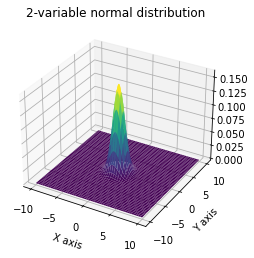

In [91]:
# 2変量正規分布、多変量正規分布

# N2(μ, Σ)であらわす。Σは分散共分散行列
# 期待値：(μ1,μ2)T
# 分散：|σ1**2, ρ*σ1*σ2|
# 　　　|ρ*σ1*σ2, σ2**2| となる
# また、μ=(0, 0)T, Σ=I2 の場合には2変量標準正規分布とよばれる

from scipy.stats import multivariate_normal

x = np.linspace(-10,10,500)
mu_x = x.mean()

y = np.linspace(-10,10,500)
mu_y = y.mean()

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[1, 0], [0, 1]])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
plt.title(f"2-variable normal distribution")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.show()

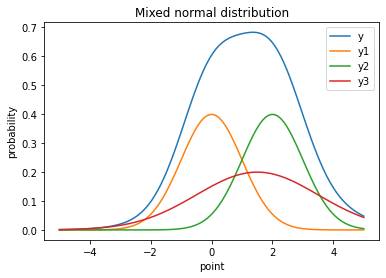

In [95]:
# 混合正規分布

# f(x) = p1*f1(x) + p2*f2(x) + .. + pn*fn(x) (pj>0かつfj(x)~N(μj, σj**2))の
# 確率密度関数をもつ分布を混合正規分布という
# 各N(μj, σj**2)を混合要素といい、p1,..pnを混合比率または混合係数という

from scipy.stats import norm

start_point = -5
end_point = 5
sample_size = 100

x = np.linspace(start_point, end_point, sample_size)
y1 = norm.pdf(x, 0, 1) # N(0, 1)
p1 = 0.3

y2 = norm.pdf(x, 2, 1) # N(2, 1)
p2 = 0.3

y3 = norm.pdf(x, 1.5, 2) # N(2, 1)
p3 = 0.4

y = y1+y2+y3

plt.title("Mixed normal distribution")
plt.ylabel("probability")
plt.xlabel("point")
plt.plot(x, y, label="y")
plt.plot(x, y1, label="y1")
plt.plot(x, y2, label="y2")
plt.plot(x, y3, label="y3")
plt.legend()
plt.show()

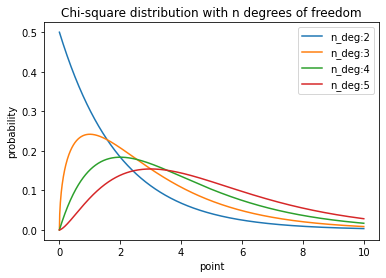

In [109]:
# カイ二乗分布

# Zi~N(0,1), i=1,..,nでこれらが互いに独立のとき
# Y = Z1**2 + .. + Zn**2に従う分布を自由度nのカイ二乗分布といいχ**2(n)で表す
# また、χ**2(n)はa=2/2, b=2のガンマ分布と一致する
# 期待値：n 分散：2*n となる

from scipy.stats import chi2

x = np.linspace(0,10,1000)
n_deg_list = [2, 3, 4, 5]

plt.title("Chi-square distribution with n degrees of freedom")
plt.ylabel("probability")
plt.xlabel("point")
for n_deg in n_deg_list:
    y = chi2.pdf(x, n_deg)
    plt.plot(x, y, label=f"n_deg:{n_deg}")
plt.legend()
plt.show()

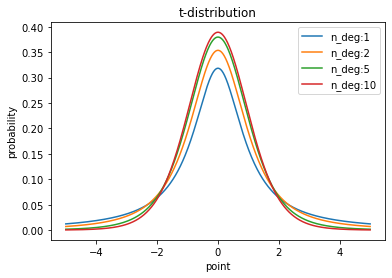

In [114]:
# t分布

# Z~N(0,1), Y~χ**2(n)でこれらが互いに独立な時
# T = Z/(√(Y/n)) が従う分布を自由度nのt分布という
# 期待値：0(n>1) 分散：n/(n-2) (n>2)となる

from scipy.stats import t

x = np.linspace(-5,5,1000)
n_deg_list = [1, 2, 5, 10]

plt.title("t-distribution")
plt.ylabel("probability")
plt.xlabel("point")
for n_deg in n_deg_list:
    y = t.pdf(x, n_deg)
    plt.plot(x, y, label=f"n_deg:{n_deg}")
plt.legend()
plt.show()

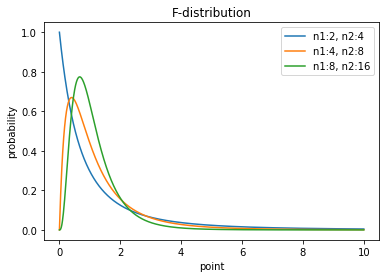

In [118]:
# F分布

# Y1~χ**2(n1), Y2~χ**2(n2)で、これらが互いに独立な時
# X = (Y1/n1)/(Y2/n2) が従う分布を自由度(n1, n2)のF分布といい、F(n1, n2)であらわす
# 期待値：n2/(n2-2) (n2>2)
# 分散：(n1+n2-2)/(n1*(n2-4)) (n>4) となる

from scipy.stats import f

x = np.linspace(0,10,1000)
n1_deg_list = [2, 4, 8]
n2_deg_list = [4, 8, 16]

plt.title("F-distribution")
plt.ylabel("probability")
plt.xlabel("point")
for i in range(len(n1_deg_list)):
    y = f.pdf(x, n1_deg_list[i], n2_deg_list[i])
    plt.plot(x, y, label=f"n1:{n1_deg_list[i]}, n2:{n2_deg_list[i]}")
plt.legend()
plt.show()